In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams


In [2]:
# read data to csv
listing = pd.read_csv('D:/airbnb/listings.csv')
listing.shape

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(85068, 106)

In [3]:
# read data to csv
calendar = pd.read_csv('D:/airbnb/calendar.csv')
calendar['id']=calendar['listing_id']
calendar.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,id
0,11551,2019-11-06,f,$105.00,$105.00,3.0,180.0,11551
1,90700,2019-11-06,f,$125.00,$125.00,90.0,1125.0,90700
2,90700,2019-11-07,f,$125.00,$125.00,90.0,1125.0,90700


In [4]:
# read data to csv
barrios = pd.read_csv('D:/airbnb/neighbourhoods.csv')
barrios.head(3)

,neighbourhood_group,neighbourhood
0,NaN,Barking and Dagenham
1,NaN,Barnet
2,NaN,Bexley


In [5]:
#data range
print('########### Years from ',min(calendar['date']) , ' TO ', max(calendar['date']) )
print('*********** Price from ',min(listing['price']) , ' TO ', max(listing['price']) )

########### Years from  2019-11-05  TO  2020-11-04
*********** Price from  $0.00  TO  $999.00


In [6]:
#avg price
hist_indicator = 't'
calv = calendar['available'].isin([hist_indicator]) 
CalendarData= calendar[calv] 
CalendarData.count()

listing_id        10151834
date              10151834
available         10151834
price             10151653
adjusted_price    10151653
minimum_nights    10151834
maximum_nights    10151834
id                10151834
dtype: int64

In [7]:
# function to clean currency data
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [8]:
#cleaning data
CalendarData['price'] = CalendarData['price'].apply(clean_currency).astype('float')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
##add agrupation for end of month
CalendarData= CalendarData.copy()
CalendarData['yearMonth'] = CalendarData['date'].str[:7]

In [10]:
CalendarData.dtypes
CalendarData.head(2)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,id,yearMonth
61,90700,2020-01-05,t,125.0,$125.00,2.0,1125.0,90700,2020-01
62,90700,2020-01-06,t,125.0,$125.00,2.0,1125.0,90700,2020-01


In [11]:
print('######Price from ',min(CalendarData['price']) , ' max ', max(CalendarData['price']))

######Price from  8.0  max  12345.0


In [12]:
CalendarData['price'].describe()

count    1.015165e+07
mean     1.533118e+02
std      2.697322e+02
min      8.000000e+00
25%      5.000000e+01
50%      9.700000e+01
75%      1.750000e+02
max      1.234500e+04
Name: price, dtype: float64

In [13]:
##calculate max an min price
ratings_count_min = CalendarData[['yearMonth','price']].groupby('yearMonth', as_index=False).min()
ratings_count_max = CalendarData[['yearMonth','price']].groupby('yearMonth',as_index=False).max()
ratings_count_min ['priceMax'] = ratings_count_max['price']
ratings_count_min.head(2)

,yearMonth,price,priceMax
0,2019-11,8.0,12345.0
1,2019-12,8.0,12345.0


In [14]:
#count of rows
months = CalendarData['yearMonth'].drop_duplicates()
tag_counts = CalendarData['yearMonth'].value_counts()
tag_counts.head()

2020-01    1177856
2020-03     998347
2020-02     961170
2020-04     948627
2019-12     941610
Name: yearMonth, dtype: int64

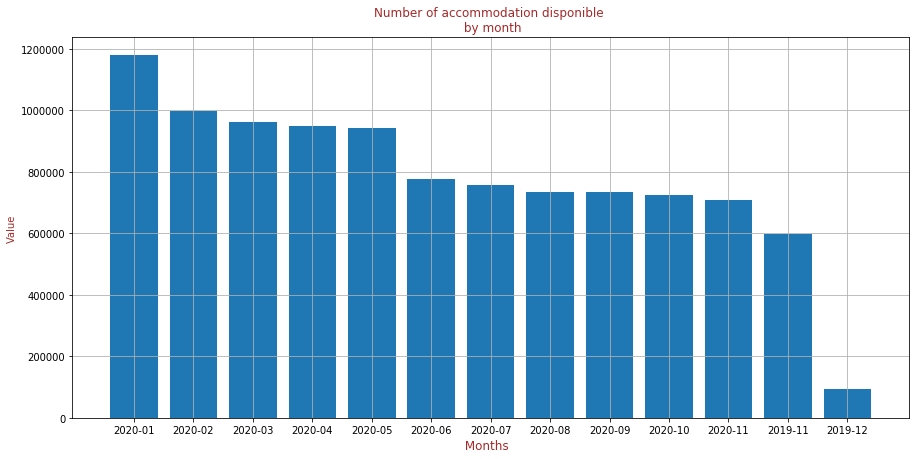

In [15]:
##counter by month
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize=(15,7))
# Grid lines, Xticks, Xlabel, Ylabel

axis.set_xlabel(' Months   ',fontsize=12, color='brown')
axis.set_ylabel('Value',fontsize=10, color='brown')

X = months
Y = tag_counts

plt.title('Number of accommodation disponible \n by month', color='brown')
axis.bar(X,Y)
axis.grid(True)
plt.show()

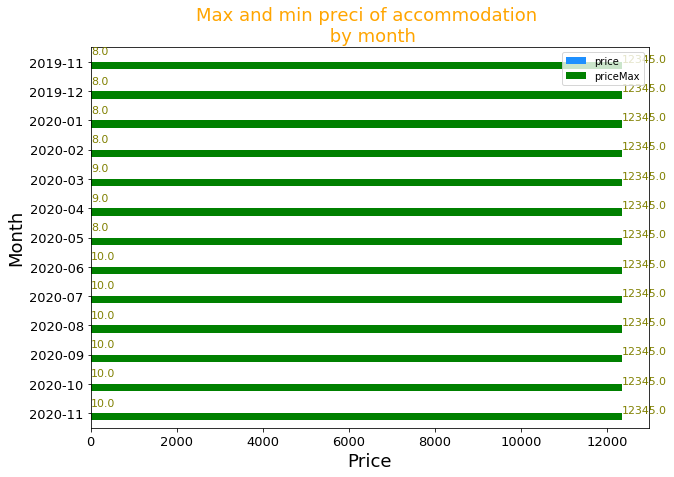

In [16]:
##MIN PRICE BY MONTH
ax = ratings_count_min[['price', 'priceMax']].plot(kind='barh',
              figsize=(10,7), color=['dodgerblue', 'green'], fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Max and min preci of accommodation \n by month",fontsize=18, color='orange')
ax.set_xlabel("Price", fontsize=18)
ax.set_ylabel("Month", fontsize=18)

ax.set_yticklabels(ratings_count_min['yearMonth'])

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    #ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),fontsize=13,color='green')
    ax.text(i.get_width(), i.get_y(), \
            str(round((i.get_width()), 2)), fontsize=11, color='olive')

# invert for largest on top 
ax.invert_yaxis()

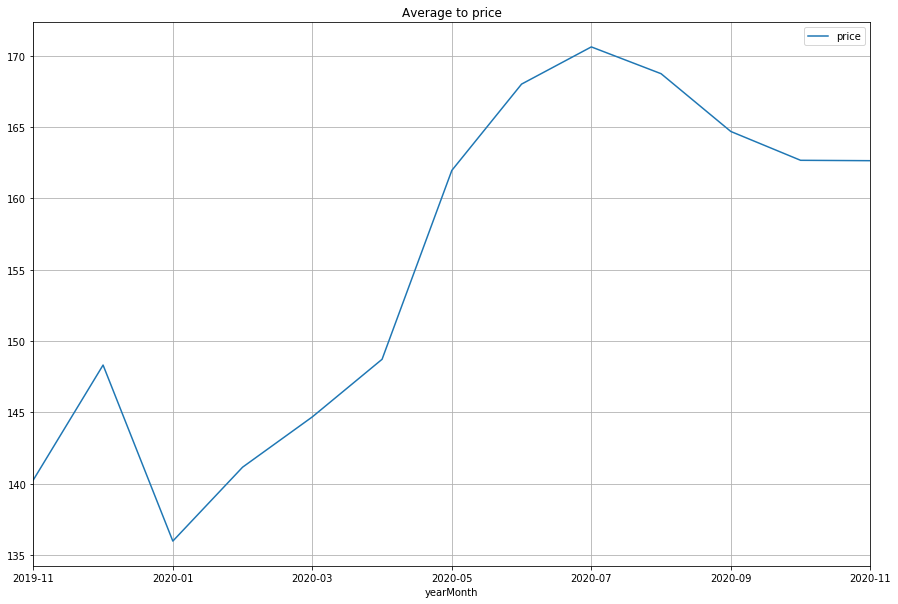

In [17]:
##koin calendar and neighbourhoods
ratings_count_avg = CalendarData[['yearMonth','price']].groupby('yearMonth', as_index=False).mean()
ratings_count_avg.plot(x='yearMonth', y='price', figsize=(15,10), grid=True, title='Average to price')

In [18]:
joined=listing.merge(barrios, on=['neighbourhood'], how='inner')
joined['price'] = joined['price'].apply(clean_currency).astype('float')
listing.shape

(85068, 106)

<Figure size 1080x720 with 0 Axes>

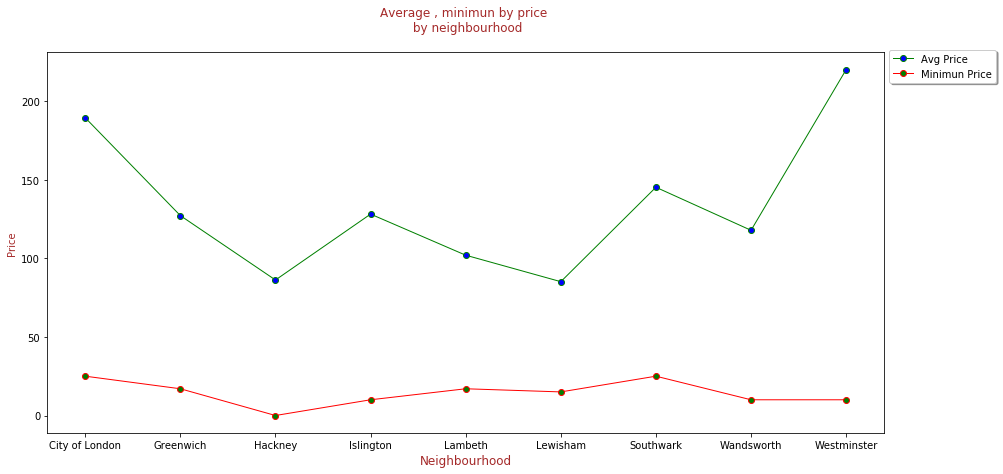

In [19]:
plt.figure(figsize=(15,10))

fig, ax = plt.subplots(figsize=(15,7))
plt.title('Average , minimun by price \n by neighbourhood\n', color='brown')
plt.xlabel('Neighbourhood',fontsize=12, color='brown')
plt.ylabel( 'Price',fontsize=10, color='brown')

##join calendar and neighbourhoods  title='Average to price \n by neighbourhood_group',
avergeCity = joined[['neighbourhood','price']].groupby('neighbourhood', as_index=False).mean()
plt.plot(avergeCity['neighbourhood'], avergeCity['price'],marker='.', markerfacecolor='blue', markersize=12, color='green', linewidth=1,label="Avg Price")

#minimum price

avergeCitymin = joined[['neighbourhood','price']].groupby('neighbourhood', as_index=False).min()
plt.plot(avergeCitymin['neighbourhood'], avergeCitymin['price'], marker='.', markerfacecolor='green', markersize=12, color='red', linewidth=1,label="Minimun Price")

plt.legend(bbox_to_anchor=(1, 1.02),fancybox=True, shadow=True)

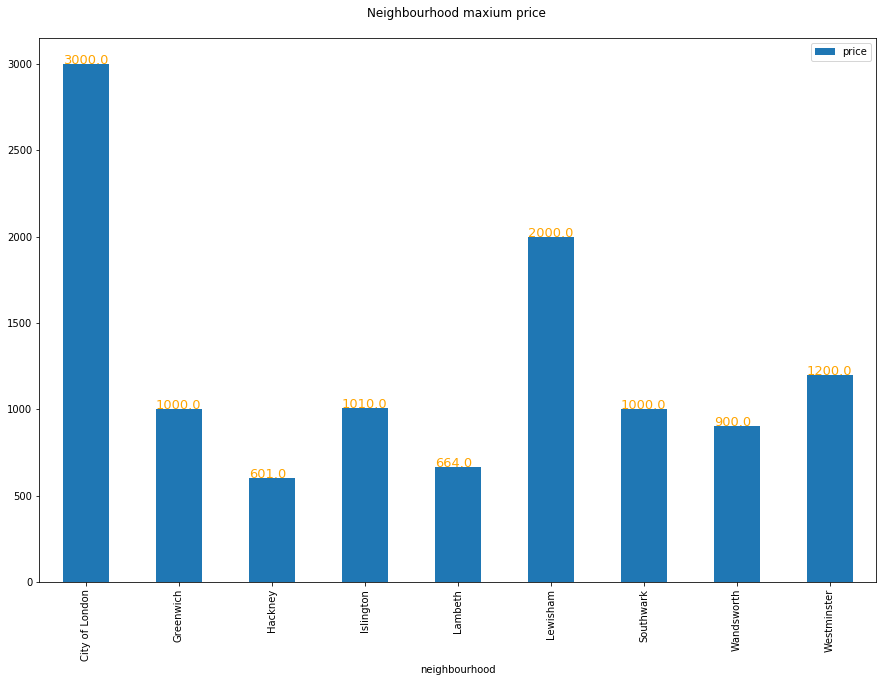

In [20]:

##Maximun price

avergeCitymax = joined[['neighbourhood','price']].groupby('neighbourhood', as_index=True).max()
ax=avergeCitymax.plot(kind='bar', figsize=(15,10), title='Neighbourhood maxium price \n')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),fontsize=13,color='orange')

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood')

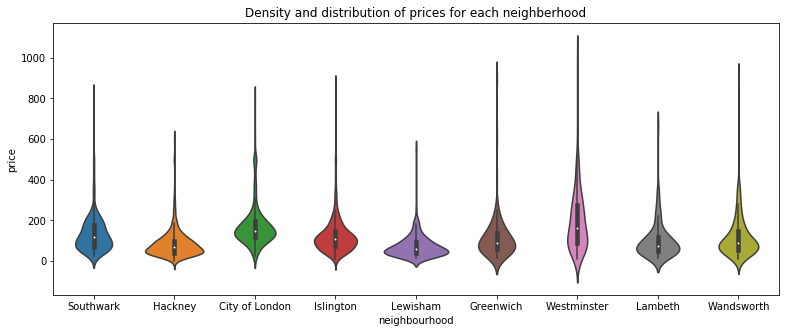

In [21]:
#desnity and distribution
sub1=joined[joined.price < 1000]
plt.figure(figsize=(13,5))
viz_2=sns.violinplot(data=sub1, x='neighbourhood', y='price', height=8, aspect=2)
viz_2.set_title('Density and distribution of prices for each neighberhood')


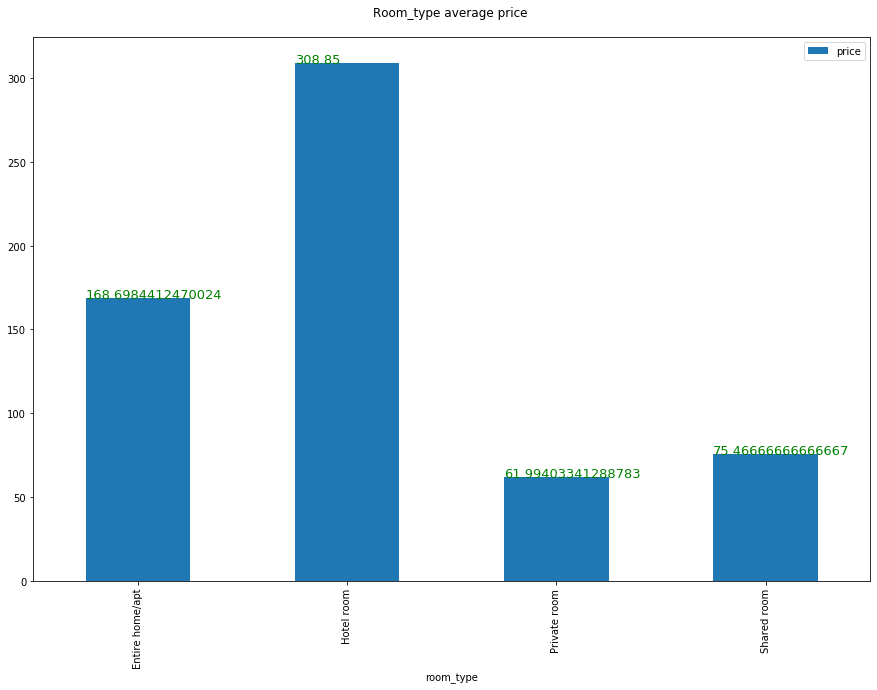

In [22]:
#avg price
avergeCitymax = joined[['room_type','price']].groupby('room_type', as_index=True).mean()
ax = avergeCitymax.plot(kind='bar', figsize=(15,10), title='Room_type average price \n')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),fontsize=13,color='green')

In [23]:
##imports lineal regresion
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [24]:
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [25]:
#Specify the Prediction Target 
features = [ 'latitude', 'longitude',  
            'minimum_nights', 'number_of_reviews','availability_365']

In [26]:
target = ['price']

In [27]:
joined['id'].count()

2561

In [28]:
x= joined[features]
x.head(2)


,latitude,longitude,minimum_nights,number_of_reviews,availability_365
0,51.50205,-0.10015,1,91,353
1,51.49865,-0.10284,3,146,0


In [29]:
y = joined[target]
y.head(2)


,price
0,60.0
1,69.0


In [30]:
x.iloc[2]

latitude              51.49907
longitude             -0.08119
minimum_nights         2.00000
number_of_reviews    159.00000
availability_365       0.00000
Name: 2, dtype: float64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=324)

In [32]:

###linael regresor
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
y_prediction = regressor.predict(X_test)
y_prediction

array([[192.60331433],
       [ -6.87209243],
       [122.54470591],
       [ 96.46985626],
       [212.53039663],
       [163.05679137],
       [213.35657222],
       [104.68081069],
       [138.32749104],
       [226.62165584],
       [121.27558288],
       [ 92.50779543],
       [ 96.11264361],
       [126.13987099],
       [121.63597505],
       [121.43322524],
       [124.13225503],
       [213.27216862],
       [ 90.98565043],
       [105.56389733],
       [116.69013019],
       [135.85756899],
       [174.24809201],
       [127.45515996],
       [104.45683872],
       [122.40533743],
       [102.46247683],
       [101.00034769],
       [149.24764948],
       [120.96985282],
       [ 98.25875389],
       [ 98.54719447],
       [118.93039576],
       [118.86171653],
       [119.44785227],
       [129.40561049],
       [127.71976157],
       [201.85272389],
       [125.26517421],
       [170.3579369 ],
       [ 31.48459645],
       [222.06155039],
       [ 97.09960647],
       [192

In [34]:
y_test.describe()

,price
count,846.000000
mean,133.419622
std,149.608373
min,0.000000
25%,56.250000
50%,99.000000
75%,150.000000
max,2000.000000


In [35]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
###std ->149.608373
print(RMSE)

144.05523178206013
